In [ ]:
#Author

"""
Avikal Sagar (as6804)
"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from prophet import Prophet
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("tmp_monthly_data_SB.csv")

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

In [ ]:
train_data = df.loc[:'2022-09-30']
test_data = df.loc['2022-09-30':]

In [ ]:
model = sm.tsa.statespace.SARIMAX(train_data["Boardings"], order=(1,1,1), seasonal_order=(0,1,1,12))
results = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
predictions = results.predict(start='2022-09-30', end='2023-01-31')

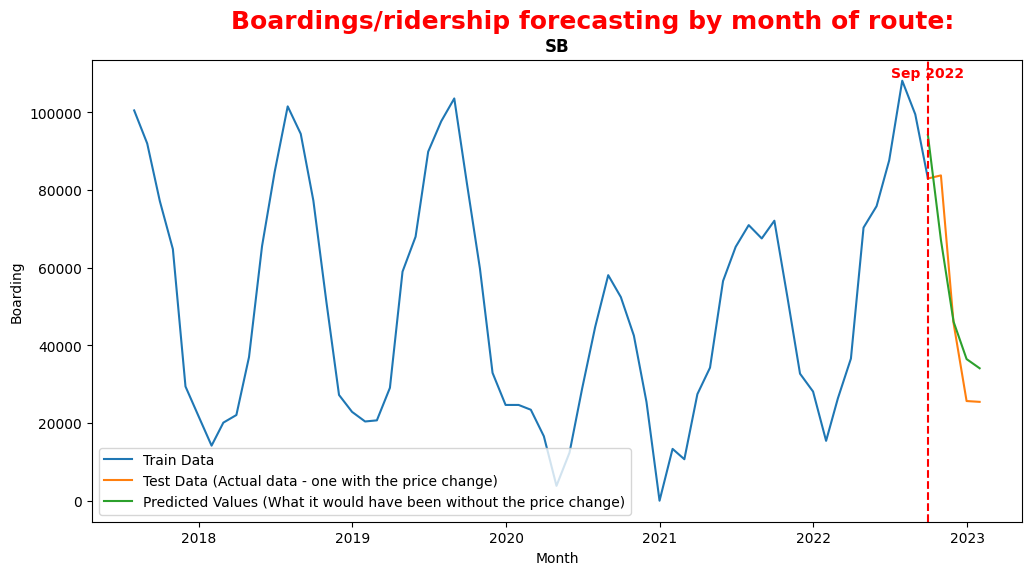

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_data.index, train_data['Boardings'], label='Train Data')
ax.plot(test_data.index, test_data['Boardings'], label='Test Data (Actual data - one with the price change)')
ax.plot(predictions.index, predictions.values, label='Predicted Values (What it would have been without the price change)')

# add a vertical line for the start of the test set
target_date = pd.to_datetime(f"2022-09-30")
xpos = mdates.date2num(target_date)
plt.axvline(x=xpos, color='red', linestyle='--')
plt.text(xpos, max(df['Boardings']), 'Sep 2022', ha='center', va='bottom', color='red', fontweight='bold')

# add any additional labels, titles, or formatting
ax.set_xlabel('Date')
ax.set_ylabel('Boardings')
title = 'SB'
title_obj = plt.title(title, loc='center', fontweight='bold')
subtitle_obj = plt.text(0.15, 1.05, 'Boardings/ridership forecasting by month of route:', color='red', transform=title_obj.get_transform(), fontweight='bold')
plt.setp(subtitle_obj, fontsize=18)
plt.xlabel('Month')
plt.ylabel('Boarding')
ax.legend()
plt.show()